This collab notebook explores some of the statistics of our labelled dataset. We visualize some images, and plot histograms on the distribution of the dataset.

In [9]:
from osgeo import gdal
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
FOLDER_PATH = "/atlas2/u/jonxuxu/datasets"
IMAGE_PATH = "/atlas2/u/jonxuxu/datasets/merged"
df = pd.read_csv(os.path.join(FOLDER_PATH, "merged_labelled.csv"))
df = df.iloc[:, 1:]

random_seed = 42
df = df.sample(frac=1, random_state=random_seed)

In [3]:
positives = df[df["activity"] == 1]
negatives  = df[df["activity"] == 0]

In [6]:
def load_geotiff(file):
    ds = gdal.Open(file)
    band1 = ds.GetRasterBand(1).ReadAsArray() # Red channel
    band2 = ds.GetRasterBand(2).ReadAsArray() # Green channel
    band3 = ds.GetRasterBand(3).ReadAsArray() # Blue channel
    img = np.dstack((band1, band2, band3))
    return img

In [12]:
images = []
for _, row in positives.head(20).iterrows():
    image = load_geotiff(os.path.join(IMAGE_PATH, row["filename"]))
    images.append(image)

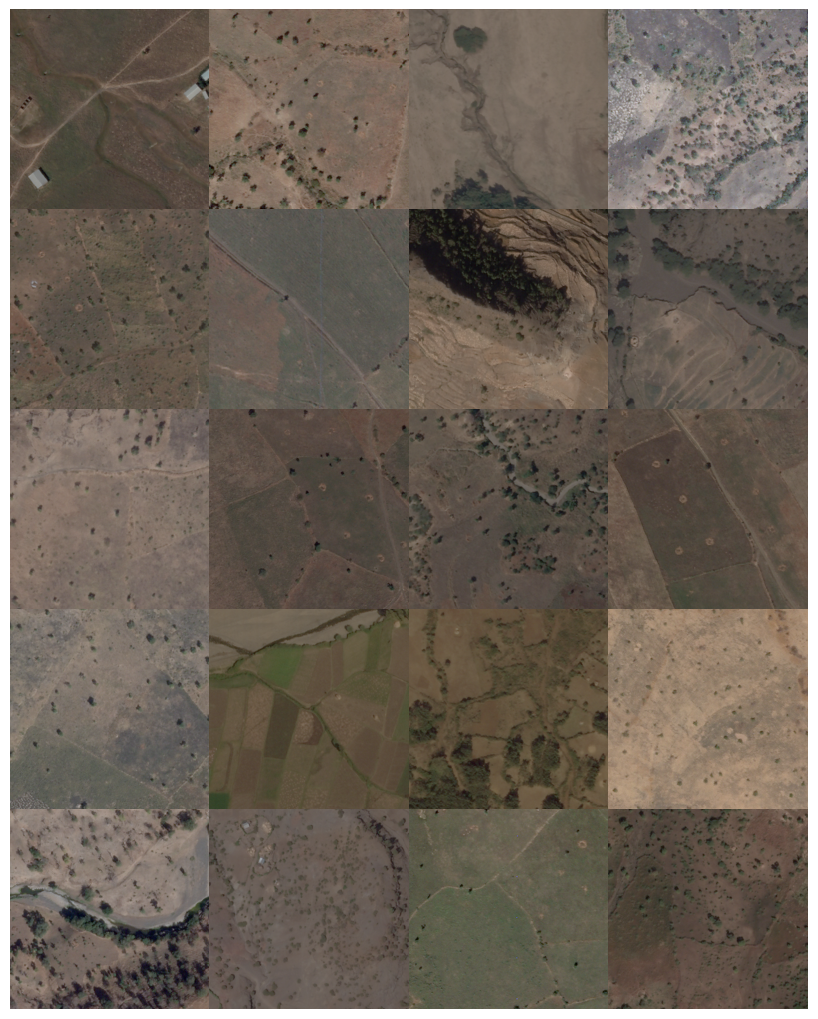

In [18]:
# Create a 4x4 subplot layout
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(8, 10))

# Loop through the images and plot them in the subplot layout
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Change cmap and other options as needed
    ax.axis('off')  # Turn off axes labels and ticks

# Adjust spacing and layout
plt.tight_layout(pad=0)

# Download the figure
plt.savefig("positives-grid.png", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace

# Show the plot
plt.show()

In [36]:
train_df = pd.read_csv(os.path.join(FOLDER_PATH, "train.csv"))
train_df = train_df.iloc[:, 1:]
test_df = pd.read_csv(os.path.join(FOLDER_PATH, "test.csv"))
test_df = test_df.iloc[:, 1:]
labelled = pd.read_csv(os.path.join(FOLDER_PATH, "merged_labelled.csv"))
labelled = labelled.iloc[:, 1:]
unlabelled = pd.read_csv(os.path.join(FOLDER_PATH, "merged.csv"))
unlabelled = unlabelled.iloc[:, 1:]

In [45]:
pos_train = train_df[train_df["activity"] == 1]
neg_train = train_df[train_df["activity"] == 0]
pos_test = test_df[test_df["activity"] == 1]
neg_test = test_df[test_df["activity"] == 0]

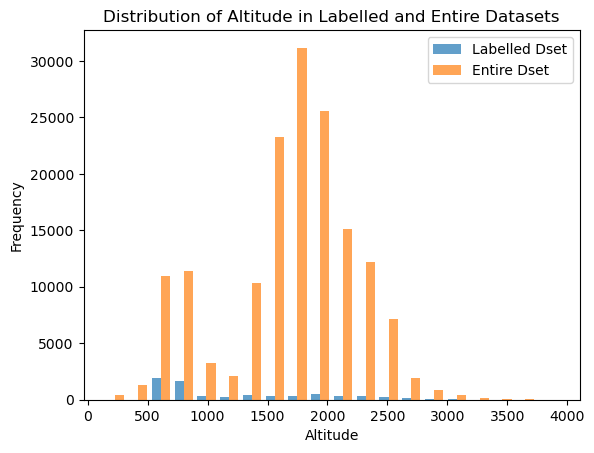

In [44]:
# Create a histogram for the train and test data
plt.hist([labelled['altitude'], unlabelled['altitude']], bins=20, label=['Labelled Dset', 'Entire Dset'], alpha=0.7, stacked=False)

# Add labels and title
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.title('Distribution of Altitude in Labelled and Entire Datasets')
plt.legend()

# Show the plot
plt.savefig("out.png", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace
plt.show()


In [ ]:
plt.hist2d(labelled['lon_mean'], labelled['lat_mean'], bins=20, cmap='Blues', label='Train')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Histogram of Latitude and Longitude in 150k Skysat Dataset')
plt.colorbar(label='Frequency')

# Show the plot
plt.savefig("out.png", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace
plt.show()

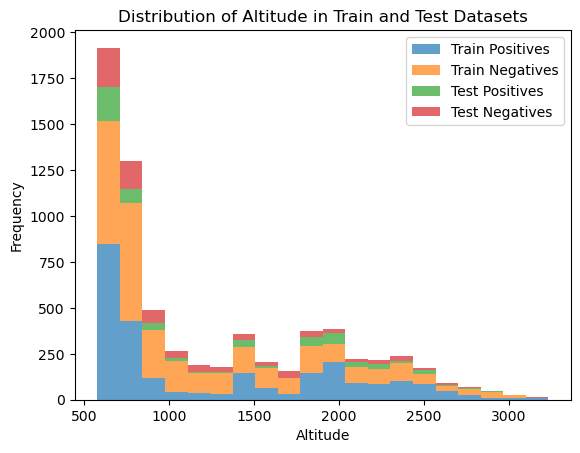

In [49]:
# Create a histogram for the train and test data
field = "altitude"
plt.hist([pos_train[field], neg_train[field],pos_test[field], neg_test[field]], bins=20, label=['Train Positives', 'Train Negatives','Test Positives', 'Test Negatives'], alpha=0.7, stacked=True)

# Add labels and title
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.title('Distribution of Altitude in Train and Test Datasets')
plt.legend()

# Show the plot
plt.savefig("out.png", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace
plt.show()
